# Model comparison with Hirata et al. 

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy 
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point
import operator

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.colors as colors

## Import dataset
this dataset is from 20-year climatologies from the first two cycles of the CORE2 interannual forcing. These are spesifically the files from 0105-0124 time period. This represents the 20-year mean from 1990-2009.

I used these 12 individual files for each month, and concatinated them into a single file, and then I using ncatted and cdo regridded to change the lats and lons to 180 by 360. 

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

## Catagorizing plankton 

| initials  | Name                      | Diameter           |
|-----------|---------------------------|--------------------|
| `mp`      | Microplankton             | >20 $\mu m$        |
| `np`      | Nanoplaknton              | 2 - 20 $\mu m$     |
| `pp`      | Picoplankton              | 0.2 - 2 $\mu m$    |

## Radius from the plankton groups, from "plankton_input_data.cvs". multipied by 2, to create their diameters. 
these are in units of $\mu m$ 

In [3]:
diaz_d  = 3.083335 *2 
picop_d = 0.359997930637595*2 
mp1_d   = 2.07846398860374*2 
mp2_d   = 12.0001038457953*2 
mp3_d   = 69.2831307636024*2 
mp4_d   = 400.009222427549*2 
diat1_d = 9.99930934816372*2 
diat2_d = 44.71981562536*2 
diat3_d = 200.000003993621*2

| Variable  | plankton composition      | Diameter           |
|-----------|---------------------------|--------------------|
| `mp1`     |mp2, mp3, mp4, diat2, diat3| >20 $\mu m$        |
| `np1`     | diaz, mp1, diat1          | 2 - 20 $\mu m$     |
| `pp1`     | pp                        | 0.2 - 2 $\mu m$    |

| Variable  | plankton composition      | 
|-----------|---------------------------|
| `l`      | mp3, mp4, diat3| 
| `m`     | diat1,mp2, diat2,          | 
| `s`     | pp,diaz, mp1,     | 

In [4]:
pp1 = ds.ppChl
mp1 = ds.mp2Chl + ds.mp3Chl + ds.mp4Chl+ ds.diat2Chl + ds.diat3Chl
np1 = ds.diazChl + ds.mp1Chl + ds.diat1Chl

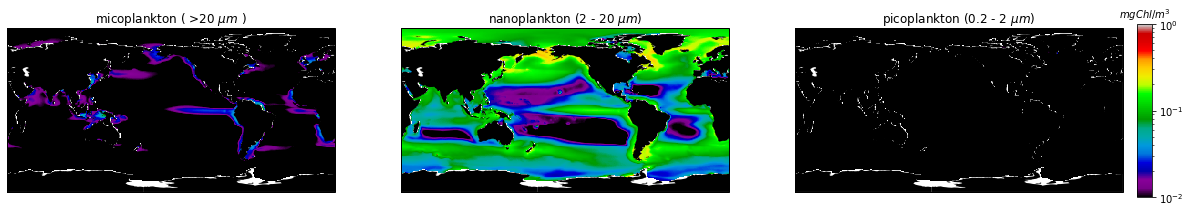

In [5]:
fig = plt.figure(figsize=(20, 3))
lat = ds.lat

#microplankton
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.log10(np.nanmean(mp1[:,0,:,:], axis = 0)+1), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax.set_title('micoplankton ( >20 $\mu m$ )')
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# nanoplankton
ax1 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.log10(np.nanmean(np1[:,0,:,:], axis = 0)+1), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax1.set_title('nanoplankton (2 - 20 $\mu m$)')
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

#picoplankton
ax2 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.log10(np.nanmean(pp1[:,0,:,:], axis = 0)+1), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(),
                norm=colors.LogNorm(vmin=0.01, vmax=1), cmap=cm.nipy_spectral)
ax2.set_title('picoplankton (0.2 - 2 $\mu m$)')
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

cb_ax = fig.add_axes([0.91, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cf, cax=cb_ax, shrink=0.5)
cbar.ax.set_title('$mg Chl/m^3$', fontsize = 10)

fig.savefig('Chla_size_fraction_log.png', dpi=600, bbox_inches='tight')

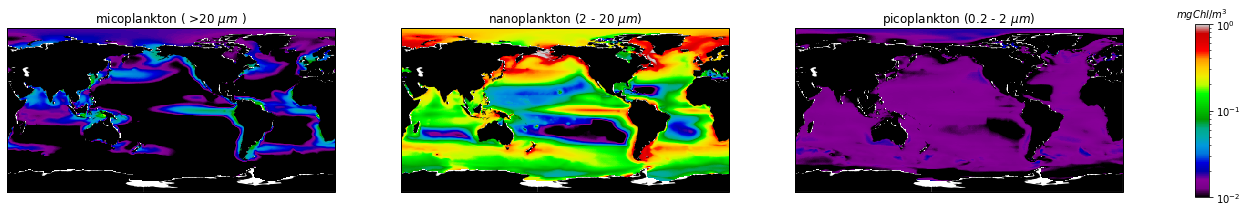

In [6]:
fig = plt.figure(figsize=(20, 3))
lat = ds.lat

#microplankton
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((mp1[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax.set_title('micoplankton ( >20 $\mu m$ )')
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# nanoplankton
ax1 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((np1[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax1.set_title('nanoplankton (2 - 20 $\mu m$)')
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

#picoplankton
ax2 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((pp1[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax2.set_title('picoplankton (0.2 - 2 $\mu m$)')
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

cb_ax = fig.add_axes([0.95, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cf, cax=cb_ax, shrink=0.5)
cbar.ax.set_title('$mg Chl/m^3$', fontsize = 10)

fig.savefig('Chla_size_fraction.png', dpi=600, bbox_inches='tight')

<img src="Figs_Question2/plankton1.png" alt="Drawing" style="width: 800px;"/> <img src="Figs_Question2/colorbar1.png" alt="Drawing" style="width: 35px;"/>

In [7]:
pp1 = ds.ppChl+ ds.diazChl + ds.mp1Chl
mp1 = ds.mp3Chl + ds.mp4Chl+ ds.diat3Chl+ ds.diat2Chl
np1 = ds.diat1Chl +  ds.mp2Chl

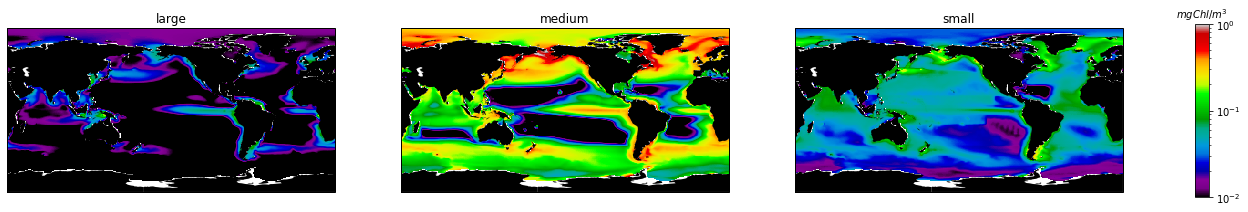

In [8]:
fig = plt.figure(figsize=(20, 3))
lat = ds.lat

#microplankton
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((mp1[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax.set_title('large')
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# nanoplankton
ax1 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((np1[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax1.set_title('medium')
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

#picoplankton
ax2 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((pp1[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  norm=colors.LogNorm(vmin=0.01, vmax=1),cmap=cm.nipy_spectral)
ax2.set_title('small')
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

cb_ax = fig.add_axes([0.95, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cf, cax=cb_ax, shrink=0.5)
cbar.ax.set_title('$mg Chl/m^3$', fontsize = 10)

fig.savefig('Chla_size_fraction_3_3_3.png', dpi=600, bbox_inches='tight')

# Chl %
### this will be calculated by -> $\frac{Chla_{size}}{Chla_{total}}$

In [9]:
pp1 = ds.ppChl
mp1 = ds.mp2Chl + ds.mp3Chl + ds.mp4Chl+ ds.diat2Chl + ds.diat3Chl
np1 = ds.diazChl + ds.mp1Chl + ds.diat1Chl
p_total = pp1+mp1+np1
pp_frac = (pp1/p_total)*100 
mp_frac = (mp1/p_total)*100
np_frac = (np1/p_total)*100

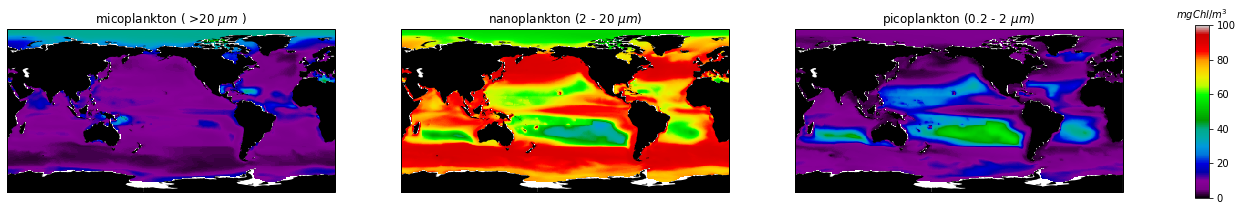

In [10]:
fig = plt.figure(figsize=(20, 3))
lat = ds.lat

#microplankton
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((mp_frac[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
               cmap=cm.nipy_spectral, vmin = 0, vmax = 100)
ax.set_title('micoplankton ( >20 $\mu m$ )')
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# nanoplankton
ax1 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((np_frac[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                cmap=cm.nipy_spectral, vmin = 0, vmax = 100)
ax1.set_title('nanoplankton (2 - 20 $\mu m$)')
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

#picoplankton
ax2 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((pp_frac[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                  cmap=cm.nipy_spectral, vmin = 0, vmax = 100)
ax2.set_title('picoplankton (0.2 - 2 $\mu m$)')
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

cb_ax = fig.add_axes([0.95, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cf, cax=cb_ax, shrink=0.5)
cbar.ax.set_title('$mg Chl/m^3$', fontsize = 10)

fig.savefig('Chla_size_fraction_percent.png', dpi=600, bbox_inches='tight')

In [11]:
pp1 = ds.ppChl+ ds.diazChl + ds.mp1Chl
mp1 = ds.mp3Chl + ds.mp4Chl+ ds.diat3Chl+ ds.diat2Chl
np1 = ds.diat1Chl +  ds.mp2Chl
p_total = pp1+mp1+np1
pp_frac = (pp1/p_total)*100 
mp_frac = (mp1/p_total)*100
np_frac = (np1/p_total)*100

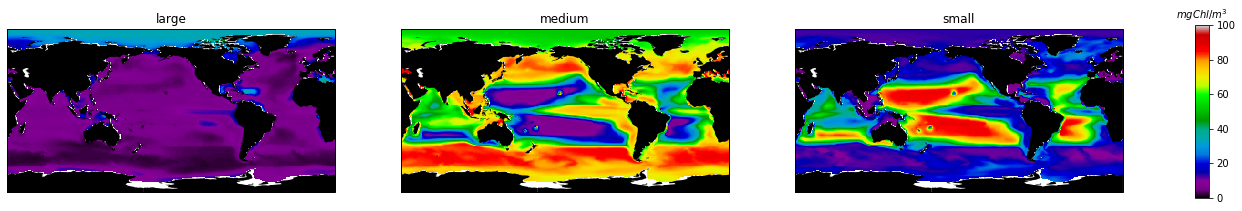

In [12]:
fig = plt.figure(figsize=(20, 3))
lat = ds.lat

#microplankton
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((mp_frac[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                   vmin = 0, vmax = 100,cmap=cm.nipy_spectral)
ax.set_title('large')
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# nanoplankton
ax1 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((np_frac[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                   vmin = 0, vmax = 100,cmap=cm.nipy_spectral)
ax1.set_title('medium')
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

#picoplankton
ax2 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((pp_frac[:,0,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), 
                   vmin = 0, vmax = 100,cmap=cm.nipy_spectral)
ax2.set_title('small')
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

cb_ax = fig.add_axes([0.95, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cf, cax=cb_ax, shrink=0.5)
cbar.ax.set_title('$mg Chl/m^3$', fontsize = 10)

fig.savefig('Chla_size_fraction_3_3_3_percent.png', dpi=600, bbox_inches='tight')